In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns

In [28]:
train_data = pd.read_csv(r"train_data.csv")

In [29]:
pd.set_option('display.max_columns',None)

# Feature Enginnering
## Handling categorical variables

In [30]:
## 1. For Nominal data we can use one hot encoder
## 2. [for Ordinal data we use Ordinal Encoder
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [31]:
Airline = pd.get_dummies(train_data['Airline'], drop_first= True)
Source = pd.get_dummies(train_data['Source'], drop_first= True)
Destination = pd.get_dummies(train_data['Destination'], drop_first= True)
Route = pd.get_dummies(train_data['Route'], drop_first= True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [32]:
# removing source, Destination columns
train_data.drop(['Source','Destination','Airline','Route',"Additional_Info"], axis =1, inplace = True)

In [33]:
data_train = pd.concat([train_data,Airline,Source,Destination,Route], axis =1)

In [34]:
x = data_train.drop(columns=['Price'])
y = data_train.Price

## Handling Outliers

In [35]:
## The target variable price is not normally distributed and found there are few outliers were there.
## here Quantile based flooring and capping is using to handle outliers
# Computing 10th, 90th percentiles and replacing the outliers
tenth_percentile = np.percentile(y, 10)
ninetieth_percentile = np.percentile(y, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
y = np.where(y>ninetieth_percentile, ninetieth_percentile, y)

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

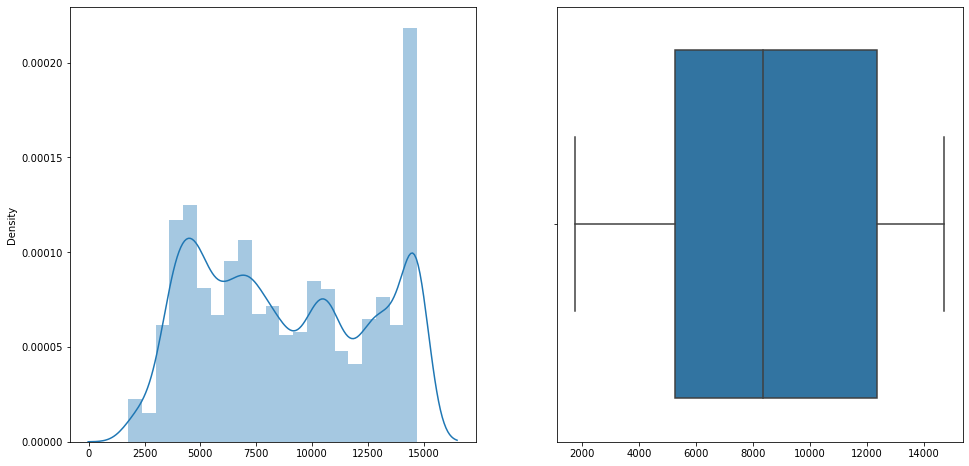

In [36]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.subplot(1,2,2)
sns.boxplot(y)

In [37]:
import scipy.stats as stats
alpha = 0.05
a,b= stats.jarque_bera(y)
print ("Statistics", a, "p-value", b)
if b < alpha:  
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")## Normality check for price

Statistics 772.1280788084949 p-value 0.0
The null hypothesis can be rejected


Even after removing outliers , the price data is not normally distributed.
here Box-Cox transformation can be used to transform the target variable into normal


/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


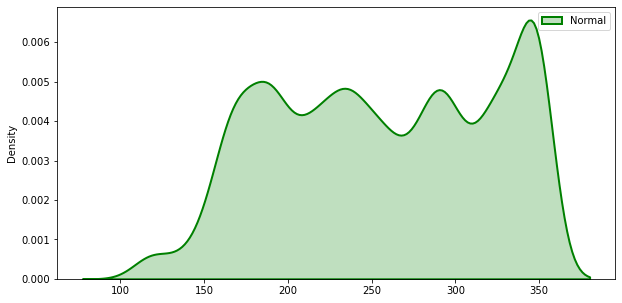

In [38]:
# Targe variable
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(y)
  
# fitted data (normal)

fig = plt.figure(figsize=(10,5))
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [39]:
## Removing outliers in Duration 
z = train_data['duration_hours']
tenth_percentile = np.percentile(z, 10)
ninetieth_percentile = np.percentile(z, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
z = np.where(z>ninetieth_percentile, ninetieth_percentile, z)


/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

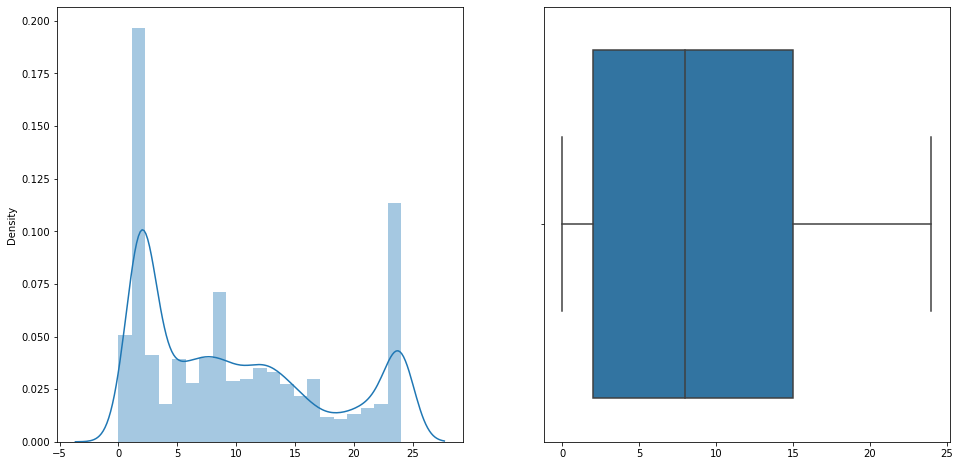

In [40]:
plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
sns.distplot(z)
plt.subplot(1,2,2)
sns.boxplot(z)

In [41]:
## Duration _hrs also not normally distributed
posdata = z[z > 0]
bcdata, lam = stats.boxcox(posdata)
lam

0.2204891105873603

In [42]:
fitted_data = np.empty_like(z)
fitted_data[z > 0] = bcdata
fitted_data[z == 0] = -1/lam

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


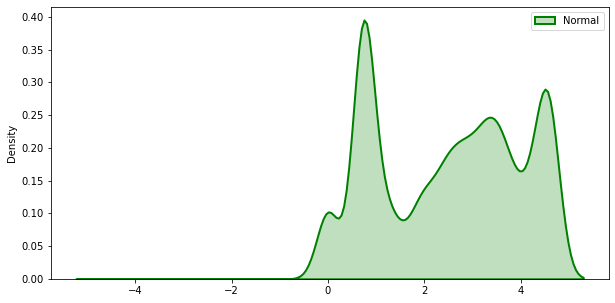

In [43]:
# fitted data (normal)

plt.figure(figsize=(10,5))
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [44]:
## Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(train_data)

In [45]:
scaled_data= pd.DataFrame(data=scaled_data, columns=train_data.columns)
scaled_data.head()

,Unnamed: 0,Total_Stops,Price,journey_day,journey_month,Dep_hour,dep_min,Arrival_hour,Arrival_minute,duration_hours,duration_mins
0,0.000000,0.00,0.027497,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.000094,0.50,0.075920,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545
2,0.000187,0.50,0.155917,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.404255,0.000000
3,0.000281,0.25,0.057348,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.106383,0.454545
4,0.000374,0.25,0.148457,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.085106,0.818182


/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_hours', ylabel='Density'>

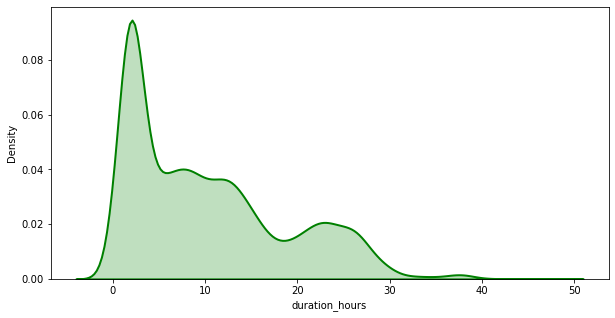

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(train_data['duration_hours'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

/Users/sujithasunkara/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

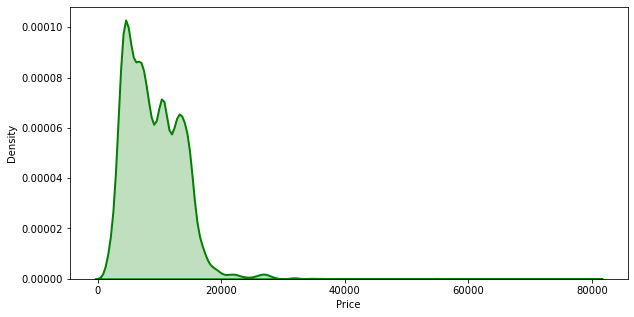

In [47]:
plt.figure(figsize=(10,5))
sns.distplot(train_data['Price'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green")

## Feature selection 


since our independent variables and target variables all are numeric variables , 
1. correlation (heatmap)
2. Feature importance 
will be use for feature selection


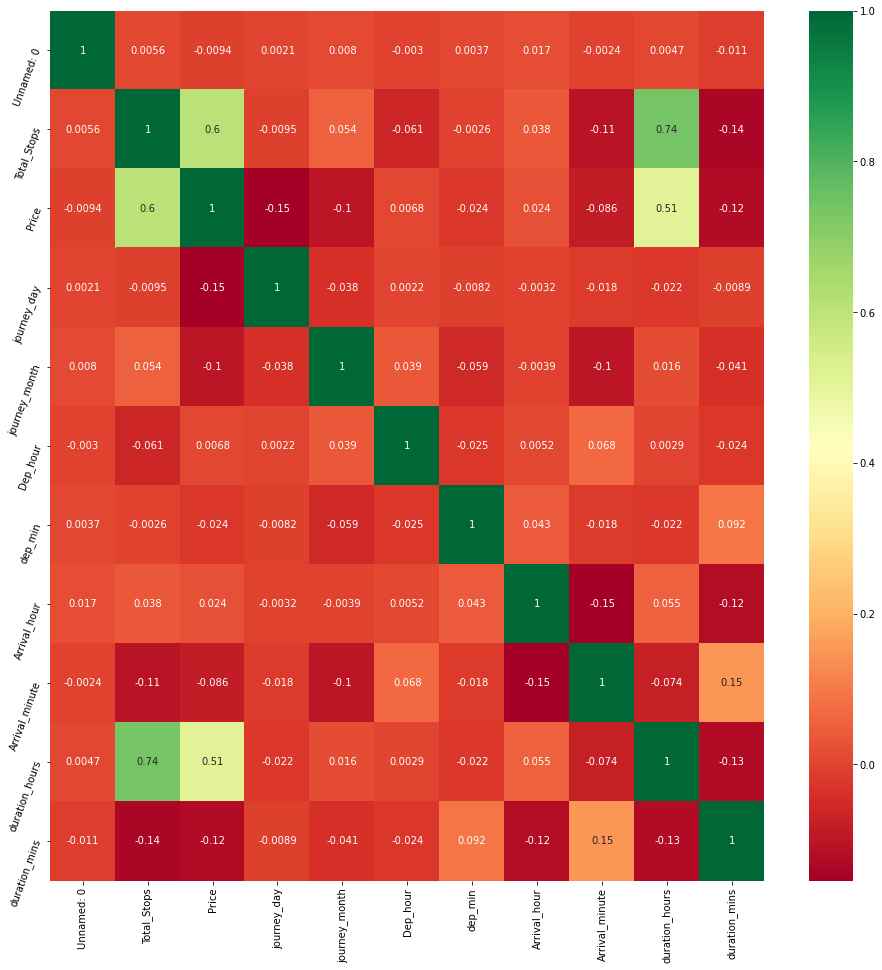

In [48]:
## Correlation
plt.figure(figsize = (16,16))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")
plt.yticks(rotation = 70)
plt.show()

Total_stops, duration and price has hoghest correlation


#### Feature selection 
used extra tree regressorb for feature selection

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [61]:
print(selection.feature_importances_)

[4.36346285e-02 2.34903823e-01 7.03611528e-02 5.66412121e-02
 1.56182504e-02 1.42052101e-02 1.21017868e-02 1.02292411e-02
 1.77022351e-01 1.06686401e-02 1.61120421e-02 3.31889358e-03
 2.18091876e-02 1.51380864e-01 1.62570966e-04 1.51773753e-02
 5.93597776e-04 3.95163695e-03 5.32517726e-05 5.54091114e-03
 1.04026752e-04 6.20102614e-04 1.07897734e-02 2.52765728e-03
 1.51917091e-03 1.15319663e-02 1.05173238e-03 1.78014372e-03
 4.13639670e-04 1.35167963e-02 2.98064536e-05 1.04218569e-04
 1.63086017e-05 1.60458104e-05 2.45141386e-03 3.90378693e-06
 3.67223118e-06 8.54201037e-07 1.43363569e-05 1.69336702e-05
 1.27404860e-05 3.47165427e-04 3.08588759e-05 1.86032774e-06
 4.51215434e-05 6.76146233e-05 6.41127165e-05 1.84886147e-02
 5.51146977e-05 3.95952715e-05 2.18596347e-05 4.69118984e-06
 3.82396037e-07 1.98661023e-03 1.96326460e-04 6.64767169e-05
 1.61957505e-05 2.43563118e-04 1.46061832e-04 5.14693914e-05
 2.26111380e-05 6.26834466e-06 1.09391881e-04 2.08235743e-04
 1.23061690e-05 4.028987

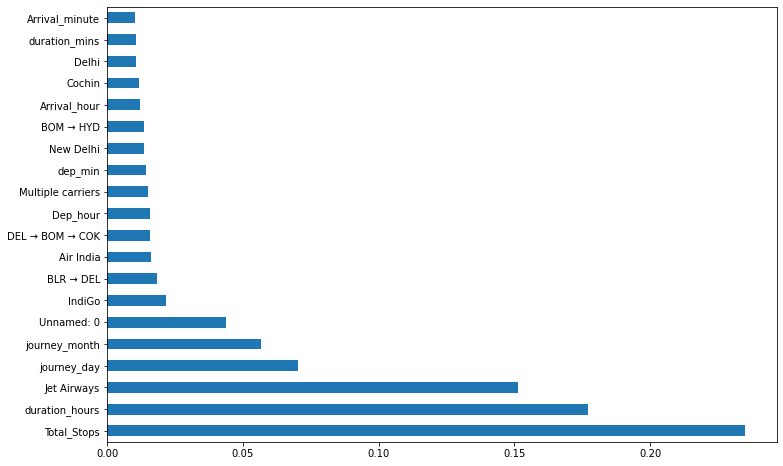

In [63]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [65]:
scaled_data.to_csv(r'train.csv')